<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Data%20Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

Kelompok C :


* Delfrin Adiyatma Situmeang - 2106759722
* Justin Martinus - 2106724832
* Miranda Rosely Manullang - 2006528710
* Nadia Hartini Kusumawijaya - 2006483542
* Whitney - 2106700946
* Yudistira Dwi Cahya - 2006530942

Studi Kasus :  
1. Apakah ada dosen yang cenderung memberikan nilai cenderung lebih tinggi (atau lebih rendah) dibandingkan dosen lainnya?
2. Menurut data yang ada, apakah terdapat perbedaan dalam pemberian nilai antara dosen dengan Pendidikan Terakhir S3 dan S2?
3. Apakah terdapat perbedaan performa akademik antara mahasiswa yang berasal dari Madrasah/SMK dan SMU?
4. Apakah ada perbedaan yang nampak di data terhadap kemampuan akademik antara mahasiswa dan mahasiswi?
5. Apakah ada perbedaan prestasi akademik yang nampak di data antar angkatan mahasiswa?
6. Apakah ada permasalahan di data atau informasi lain yang anda temukan di data?


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    mengajar = pd.read_csv('data/mengajar.csv', encoding='utf8')
    dosen = pd.read_csv('data/tb_dosen.csv', encoding='utf8')
    kelas = pd.read_csv('data/tb_kelas.csv', encoding='utf8')
    krs = pd.read_csv('data/tb_krs.csv', encoding='utf8')
    mahasiswa = pd.read_csv('data/tb_mahasiswa.csv', encoding='utf8')
    matkul = pd.read_csv('data/tb_mata_kuliah.csv', encoding='utf8')
    nilai = pd.read_csv('data/tb_nilai.csv', encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_nilai.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/mengajar.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_dosen.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_kelas.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_krs.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_mahasiswa.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_mata_kuliah.csv
    mengajar = pd.read_csv('data/mengajar.csv', encoding='utf8')
    dosen = pd.read_csv('data/tb_dosen.csv', encoding='utf8')
    kelas = pd.read_csv('data/tb_kelas.csv', encoding='utf8')
    krs = pd.read_csv('data/tb_krs.csv', encoding='utf8')
    mahasiswa = pd.read_csv('data/tb_mahasiswa.csv', encoding='utf8')
    matkul = pd.read_csv('data/tb_mata_kuliah.csv', encoding='utf8')
    nilai = pd.read_csv('data/tb_nilai.csv', encoding='utf8')

mengajar.shape, dosen.shape, kelas.shape, krs.shape, mahasiswa.shape, matkul.shape, nilai.shape

--2022-11-18 02:30:33--  https://raw.githubusercontent.com/taudataid/eLearning/master/data/tb_nilai.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1136 (1.1K) [text/plain]
Saving to: ‘data/tb_nilai.csv’

tb_nilai.csv        100%[===================>]   1.11K  --.-KB/s    in 0s      

2022-11-18 02:30:33 (68.4 MB/s) - ‘data/tb_nilai.csv’ saved [1136/1136]

--2022-11-18 02:30:33--  https://raw.githubusercontent.com/taudataid/eLearning/master/data/mengajar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 329 [text/plain]
Savi

((14, 4), (4, 6), (4, 4), (7, 6), (15, 8), (9, 3), (33, 7))

In [ ]:
##Melihat 10 sampel teratas dari setiap tabel data

In [ ]:
mengajar.head(10)

,NIDN,kode_MK,Semester,Tahun
0,123,KAL01,ganjil,2020
1,123,KAL01,ganjil,2019
2,123,STA01,genap,2020
3,123,MAT01,genap,2020
4,123,STA02,ganjil,2019
5,234,OR01,ganjil,2019
6,234,CS01,genap,2020
7,787,KAL01,ganjil,2021
8,787,KAL01,ganjil,2022
9,787,STA02,ganjil,2021


In [ ]:
dosen.head(10)

,NIDN,nama,email,Pendidikan_Terakhir,Telephone,Jenis_Kelamin
0,123,Andri Basuki,anbr@googol.com,S3,11230000,Pria
1,234,zulfikar,dosen@email.com,S3,22340000,Pria
2,787,yudi,yudi@email.com,S2,55670000,Pria
3,345,Annisa Fitria,annniza@yyyy.com,S2,88970000,Wanita


In [ ]:
kelas.head(10)

,kode_kelas,nama_kelas,lokasi_kelas,Kapasitas
0,SIS1J,Reguler A,Gedung D,10
1,D101,Reguler A,Gedung D,15
2,D212,Reguler B,Gedung D,40
3,P601,Reguler B,Gedung PLT,30


In [ ]:
krs.head(10)

,id,id_mata_kuliah,kode_kelas,nim,tahun,semester
0,1,KAL01,SIS1J,193001,2021,genap
1,2,STA01,D101,193001,2021,genap
2,3,OR01,D212,193001,2021,genap
3,4,MK002,P601,194001,2021,genap
4,5,MK002,P601,194001,2021,genap
5,6,MK003,SIS1J,194001,2021,genap
6,7,MK004,D101,194001,2021,genap


In [ ]:
mahasiswa.head(10)

,nim,nama,email,Gender,Asal_Sekolah,Telephone,Angkatan,Asal_Daerah
0,194015,Muhammad Amir,Samarinda@inet.com,Pria,SMU,12345678,2019,Luar Daerah
1,194001,Samsul Kurnia,Bontang@email.com,Pria,SMU,12345679,2019,Lokal
2,194002,Bambang Arifin,Sangata@inet.com,Pria,SMU,12345680,2019,Luar Daerah
3,194003,Udin,Udin@inet.com,Pria,MA,12345681,2019,Lokal
4,194004,Iwan,Iwan@inet.com,Pria,MA,12345682,2019,Luar Daerah
5,194005,Bambang Arifin,Bambang Arifin@inet.com,Pria,SMK,12345683,2019,Lokal
6,194006,Wati,Wati@inet.com,Wanita,SMK,12345684,2019,Lokal
7,194007,Ani,Ani@inet.com,Wanita,SMK,12345685,2019,Luar Daerah
8,194008,Rahmawati,Rahmawati@inet.com,Wanita,SMU,12345686,2020,Lokal
9,194009,Asep,Asep@inet.com,Pria,SMU,12345687,2020,Luar Daerah


In [ ]:
matkul.head(10)

,id_mata_kuliah,nama_mata_kuliah,SKS
0,KAL01,Kalkulus Dasar,3
1,STA01,Statistika Elementer,3
2,MAT01,Matematika Dasar,3
3,STA02,Statistika Matematika,4
4,OR01,Operation Research,4
5,CS01,Pendahuluan Ilmu Komputer,3
6,MAT73,Aljabar Abstrak,4
7,MAT53,Aljabar linear,3
8,KAL02,Kalkulus Lanjut,4


In [ ]:
nilai.head(10)

,nim,id_mata_kuliah,NIDN,nilai,Semester,Tahun,rand
0,194015,KAL01,123,70,ganjil,2019,0.50463
1,194001,KAL01,123,80,ganjil,2019,NaN
2,194002,KAL01,123,85,ganjil,2019,NaN
3,194003,KAL01,123,90,ganjil,2019,NaN
4,194004,KAL01,123,92,ganjil,2019,NaN
5,194005,KAL01,123,91,ganjil,2019,NaN
6,194006,KAL01,123,93,ganjil,2019,NaN
7,194007,KAL01,123,85,ganjil,2019,NaN
8,194008,KAL01,787,60,ganjil,2020,NaN
9,194009,KAL01,787,63,ganjil,2020,NaN


# Nomor 1

In [ ]:
nilai_dosen = nilai.groupby(nilai['NIDN']).mean()[['nilai']]
nilai_dosen = nilai_dosen.rename({'nilai': 'mean_nilai'}, axis=1)
nilai_dosen = pd.merge(dosen, nilai_dosen, left_on='NIDN', right_index=True)
nilai_dosen = nilai_dosen[['NIDN', 'nama', 'mean_nilai']]
sb = nilai.groupby(nilai['NIDN']).std()[['nilai']]
sb = sb.rename({'nilai': 'std_nilai'}, axis=1)
nilai_dosen = nilai_dosen.set_index(['NIDN'])
nilai_dosen = pd.concat([nilai_dosen, sb], axis=1)
nilai_dosen

,nama,mean_nilai,std_nilai
NIDN,,,
123,Andri Basuki,85.750000,7.741355
234,zulfikar,80.428571,15.883504
345,Annisa Fitria,60.090909,16.220077
787,yudi,70.571429,13.010984


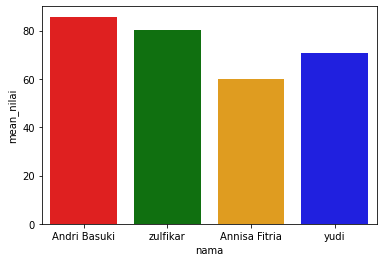

In [ ]:
import seaborn as sns
palette = ['red', 'g', 'orange', 'b']

sns.barplot(x='nama', y='mean_nilai', data=nilai_dosen, palette=palette)

## Interpretasi 01

Semakin besar nilai standard deviation maka semakin beragam nilai-nilai pada item atau semakin tidak akurat dengan mean.



*   Andri Basuki: Meannya paling tinggi dan Std-nya paling rendah, jadi mean cukup merepresentasikan nilai keseluruhan. Artinya, nilai yang diberikan Andri Basuki kebanyakan adalah/berpusat pada 85.
*   Annisa Fitria: Meannya paling rendah dan Std-nya paling tinggi, jadi mean kurang merepresentasikan nilai keseluruhan. Artinya, nilai yang diberikan Annisa Fitria tidak berpusat pada 60, tapi nilai yang diberikan kebanyakan cukup rendah daripada nilai yang diberikan Andri Basuki

Jadi, dosen yang cenderung memberikan nilai lebih tinggi adalah Andri Basuki dan dosen yang cenderung memberikan nilai lebih rendah adalah Annisa Fitria



# Nomor 2

In [ ]:
# Code Untuk Soal No 02

nilai_dosen_pend = nilai.groupby(nilai['NIDN']).mean()[['nilai']]
nilai_dosen_pend = nilai_dosen_pend.rename({'nilai': 'mean_nilai'}, axis=1)
nilai_dosen_pend = pd.merge(dosen, nilai_dosen_pend, left_on='NIDN', right_index=True)
nilai_dosen_pend = nilai_dosen_pend[['NIDN', 'Pendidikan_Terakhir', 'mean_nilai']]
sb_pend = nilai.groupby(nilai['NIDN']).std()[['nilai']]
sb_pend = sb_pend.rename({'nilai': 'std_nilai'}, axis=1)
nilai_dosen_pend = nilai_dosen_pend.set_index(['NIDN'])
nilai_dosen_pend = pd.concat([nilai_dosen_pend, sb_pend], axis=1)
nilai_dosen_pend.pivot_table(index='Pendidikan_Terakhir')

,mean_nilai,std_nilai
Pendidikan_Terakhir,,
S2,65.331169,14.615531
S3,83.089286,11.812430


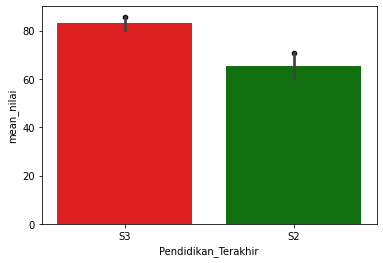

In [ ]:
palette = ['red', 'g']
sns.barplot(x='Pendidikan_Terakhir', y='mean_nilai', data=nilai_dosen_pend, color='red', palette=palette)

sns.scatterplot(x='Pendidikan_Terakhir', y='mean_nilai', data=nilai_dosen_pend, color='black')

## Interpretasi 02

Dengan interpretasi mean dan Std yang sama seperti interpretasi nomor 1,

*   Dosen lulusan S3 memiliki rata-rata lebih tinggi dan std (variasi nilai) lebih rendah, jadi rata-rata nilai cukup merepresentasikan nilai keseluruhan. Artinya, nilai yang diberikan dosen lulusan S3 cukup berpusat di 83.
*   Dosen lulusan S2 memiliki rata-rata lebih rendah dan std (variasi nilai) lebih tinggi, jadi rata-rata kurang merepresentasikan nilai keseluruhan. Artinya, nilai yang diberikan dosen lulusan S2 kurang berpusat di 65.

Meskipun nilai yg diberikan dosen lulusan S2 tidak berpusat di 65, nilai yang diberikan dosen lulusan S3 paling banyak adalah 83.

Jadi, Dosen lulusan S3 cenderung memberikan nilai lebih besar dibanding dosen lulusan S2 pada data ini.





# Nomor 3

In [ ]:
# Code Untuk Soal No 03

# Code Soal No 03
nilai_mahasiswa = nilai.groupby(nilai['nim']).mean()[['nilai']]
nilai_mahasiswa = nilai_mahasiswa.rename({'nilai': 'mean_nilai'}, axis=1)
nilai_mahasiswa = pd.merge(mahasiswa, nilai_mahasiswa, left_on='nim', right_index=True)
nilai_mahasiswa = nilai_mahasiswa[['nim', 'Asal_Sekolah', 'mean_nilai']]
sb_mah = nilai.groupby(nilai['nim']).std()[['nilai']]
sb_mah = sb_mah.rename({'nilai': 'std_nilai'}, axis=1)
nilai_mahasiswa = nilai_mahasiswa.set_index(['nim'])
nilai_mahasiswa = pd.concat([nilai_mahasiswa, sb_mah], axis=1)
nilai_mahasiswa.pivot_table(index='Asal_Sekolah')


,mean_nilai,std_nilai
Asal_Sekolah,,
MA,71.937500,19.673045
SMK,85.900000,4.693409
SMU,66.416667,16.729164


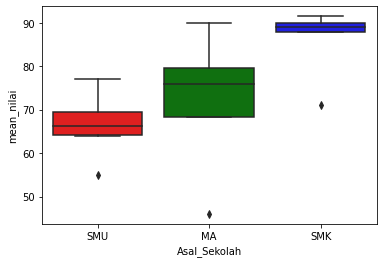

In [ ]:
palette = ['red', 'g', 'b']
sns.boxplot(x='Asal_Sekolah', y='mean_nilai', data=nilai_mahasiswa, palette=palette)

## Interpretasi 03

*   SMK: Rata-rata nilai paling tinggi dan Std-nya (variasi nilai)paling rendah, jadi rata-rata cukup merepresentasikan nilai keseluruhan. Artinya, nilai yang diperoleh mahasiswa lulusan SMK cenderung berpusat di 85.9. Berdasarkan plot, terlihat pula bahwa nilai lulusan SMK lebih tinggi dibanding lulusan lainnya.
*   SMU: Rata-rata paling rendah dan nilai Std-nya (variasi nilai)paling di tengah-tengah (lebih kecil daripada MA dan lebih besar daripada SMK). Berdasarkan plot, terlihat pula bahwa nilai lulusan SMU cenderung lebih rendah dibanding lulusan lainnya.

Jadi, mahasiswa lulusan SMK cenderung memiliki performa akademis paling baik dan mahasiswa lulusan SMU memiliki performa akademis paling buruk di antara yang lainnya.




# Nomor 4

In [ ]:
# Code Untuk Soal No 04

# Code Soal No 04

nilai_mahasiswag = nilai.groupby(nilai['nim']).mean()[['nilai']]
nilai_mahasiswag = nilai_mahasiswag.rename({'nilai': 'mean_nilai'}, axis=1)
nilai_mahasiswag = pd.merge(mahasiswa, nilai_mahasiswag, left_on='nim', right_index=True)
nilai_mahasiswag = nilai_mahasiswag[['nim', 'Gender', 'mean_nilai']]
sbc = nilai.groupby(nilai['nim']).std()[['nilai']]
sbc = sbc.rename({'nilai': 'std_nilai'}, axis=1)
nilai_mahasiswag = nilai_mahasiswag.set_index(['nim'])
nilai_mahasiswag = pd.concat([nilai_mahasiswag, sbc], axis=1)
nilai_mahasiswag.pivot_table(index='Gender')

,mean_nilai,std_nilai
Gender,,
Pria,75.750000,15.905278
Wanita,72.333333,11.001154


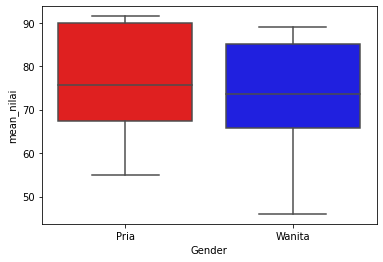

In [ ]:
palette = ['red','b']
sns.boxplot(x='Gender', y='mean_nilai', data=nilai_mahasiswag, palette=palette)

## Interpretasi 04


*   Pria: Mahasiswa pria memiliki rata -rata nilai paling tinggi tetapi standar deviasinya  juga tinggi, jadi walaupun memiliki rata-rata nilai 75.75 yang lebih tinggi daripada perempuan, nilai tersebut belum cukup merepresentasikan nilai keseluruhan mahasiswa pria karena memiliki standar deviasi (variasi nilai) yang lebih tinggi.
*   Wanita: Mahasiswa wanita memiliki rata -rata nilai paling rendah tetapi standar deviasinya (variasi nilai) paling rendah, jadi rata-rata nilai cukup merepresentasikan nilai keseluruhan. Artinya, nilai mahasiswa wanita cenderung berpusat pada 72.333.
* Jika dilihat dari boxplot didapat nilai  paling rendah (garis paling rendah dari boxplot) dari mahasiswa pria, masih lebih tinggi daripada mahasiswa wanita, serta nilai yang paling tinggi (garis paling tinggi dari boxplot) dari mahasiswa pria masih lebih tinggi daripada mahasiswa wanita.

Sehingga dapat disimpulkan mahasiswa pria cenderung memiliki performa akademis yang lebih bagus daripada wanita pada data ini

# Nomor 5

In [ ]:
prestasi_angkatan = nilai.groupby(nilai['nim']).mean()[['nilai']]
prestasi_angkatan = prestasi_angkatan.rename({'nilai': 'mean_nilai'}, axis=1)
prestasi_angkatan = pd.merge(mahasiswa, prestasi_angkatan, left_on='nim', right_index=True)
prestasi_angkatan = prestasi_angkatan[['nim', 'Angkatan', 'mean_nilai']]
sb = nilai.groupby(nilai['nim']).std()[['nilai']]
sb = sb.rename({'nilai': 'std_nilai'}, axis=1)
prestasi_angkatan = prestasi_angkatan.set_index(['nim'])
prestasi_angkatan = pd.concat([prestasi_angkatan, sb], axis=1)
prestasi_angkatan.pivot_table(index='Angkatan')

,mean_nilai,std_nilai
Angkatan,,
2019,75.59375,13.385601
2020,73.00000,13.547877


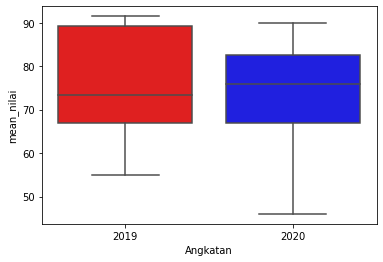

In [ ]:
palette = ['red', 'b']
sns.boxplot(x='Angkatan', y='mean_nilai', data=prestasi_angkatan, palette=palette)

## Interpretasi 05


*   2019: Mahasiswa angkatan 2019 memiliki rata -rata nilai paling tinggi tetapi standar deviasinya rendah, jadi rata-rata nilai cukup merepresentasikan nilai keseluruhan. Artinya, nilai mahasiswa angkatan 2019 cenderung berpusat pada 75.59375.  
*   2020: Mahasiswa angkatan 2020 memiliki rata -rata nilai paling rendah tetapi memiliki standar deviasi yang paling tinggi, jadi rata-rata nilai 73.00000 belum cukup merepresentasikan nilai keseluruhan.
* Jika dilihat dari boxplot didapat nilai  paling rendah (garis paling rendah dari boxplot) dari mahasiswa angkatan 2019, masih lebih tinggi daripada mahasiswa angkatan 2020, serta nilai yang paling tinggi (garis paling tinggi dari boxplot) dari mahasiswa angkatan 2019 masih lebih tinggi daripada mahasiswa angkatan 2020.

Sehingga dapat disimpulkan mahasiswa angkatan 2019 cenderung memiliki performa akademis yang lebih bagus daripada mahasiswa angkatan 2020 pada data ini

# Nomor 6

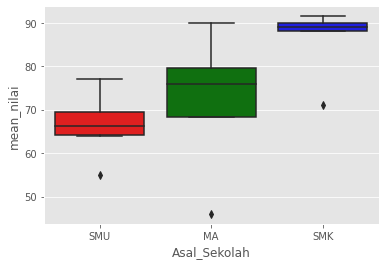

In [ ]:
#Permasalahan
sns.boxplot(x='Asal_Sekolah', y='mean_nilai', data=nilai_mahasiswa, palette=palette)
palette = ['red', 'g', 'b']

Berdasarkan boxplot nomor 3, ditemukan permasalahan berupa outliers

In [ ]:
#Informasi Lain

nilai_matkul = nilai.groupby(nilai['id_mata_kuliah']).mean()[['nilai']]
nilai_matkul = nilai_matkul.rename({'nilai': 'mean_nilai'}, axis=1)
nilai_matkul = pd.merge(matkul, nilai_matkul, left_on='id_mata_kuliah', right_index=True)
nilai_matkul = nilai_matkul[['id_mata_kuliah', 'nama_mata_kuliah', 'mean_nilai']]
sd = nilai.groupby(nilai['id_mata_kuliah']).std()[['nilai']]
sd = sd.rename({'nilai': 'std_nilai'}, axis=1)
nilai_matkul = nilai_matkul.set_index(['id_mata_kuliah'])
nilai_matkul = pd.concat([nilai_matkul, sd], axis=1)
nilai_matkul

,nama_mata_kuliah,mean_nilai,std_nilai
id_mata_kuliah,,,
KAL01,Kalkulus Dasar,78.666667,12.804389
STA02,Statistika Matematika,58.142857,19.836234
CS01,Pendahuluan Ilmu Komputer,80.428571,15.883504
KAL02,Kalkulus Lanjut,63.500000,8.103497


[Text(0, 0, 'Kalkulus Dasar'),
 Text(0, 0, 'Statistika Matematika'),
 Text(0, 0, 'Pendahuluan Ilmu Komputer'),
 Text(0, 0, 'Kalkulus Lanjut')]

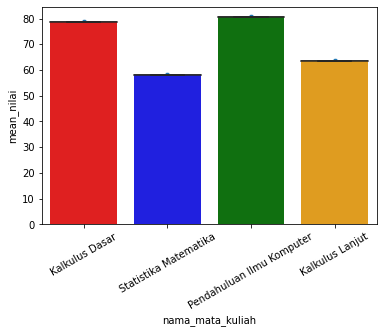

In [ ]:
palette = ['red', 'b', 'g', 'orange']
g = sns.barplot(x='nama_mata_kuliah', y='mean_nilai', data=nilai_matkul, palette=palette)
sns.boxplot(x='nama_mata_kuliah', y='mean_nilai', data=nilai_matkul, palette=palette)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Interpretasi:

*   Matkul STA02 memiliki rata-rata terendah dan std (variasi nilai) tertinggi, jadi tidak dapat disimpulkan bahwa STA02 adalah matkul yang paling sulit karena nilai mahasiswa tidak terpusat di 58.
*   Matkul KAL02 dengan std (variasi nilai) terendah rata-rata tidak tertinggi dan matkul CS01 dengan mean tertinggi stdnya tidak terendah

Jadi, tidak dapat diperoleh kesimpulan apapun

In [ ]:
#Informasi Tambahan

nilai_mahasiswa_daerah = nilai.groupby(nilai['nim']).mean()[['nilai']]
nilai_mahasiswa_daerah = nilai_mahasiswa_daerah.rename({'nilai': 'mean_nilaid'}, axis=1)
nilai_mahasiswa_daerah = pd.merge(mahasiswa, nilai_mahasiswa_daerah, left_on='nim', right_index=True)
nilai_mahasiswa_daerah = nilai_mahasiswa_daerah[['nim', 'Asal_Daerah', 'mean_nilaid']]
sb_mah = nilai.groupby(nilai['nim']).std()[['nilai']]
sb_mah = sb_mah.rename({'nilai': 'std_nilai'}, axis=1)
nilai_mahasiswa_daerah = nilai_mahasiswa_daerah.set_index(['nim'])
nilai_mahasiswa_daerah = pd.concat([nilai_mahasiswa_daerah, sb_mah], axis=1)
nilai_mahasiswa_daerah.pivot_table(index='Asal_Daerah')

,mean_nilaid,std_nilai
Asal_Daerah,,
Lokal,78.000000,10.283147
Luar Daerah,68.958333,17.891313


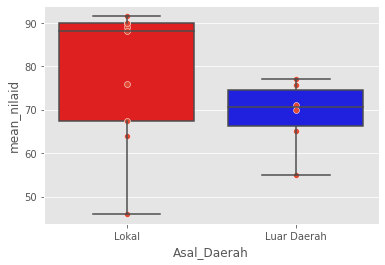

In [ ]:
palette = ['red', 'b', 'g', 'o']
sns.boxplot(x='Asal_Daerah', y='mean_nilaid', data=nilai_mahasiswa_daerah, palette=palette)
sns.scatterplot(x='Asal_Daerah', y='mean_nilaid', data=nilai_mahasiswa_daerah, palette=palette)

## Interpretasi 06


*   Lokal: Mahasiswa yang berasal dari daerah lokal memiliki rata -rata nilai paling tinggi tatapi standar deviasinya (variasi nilai) rendah, jadi rata-rata nilai cukup merepresentasikan nilai keseluruhan. Artinya, nilai mahasiswa yang berasal dari daerah lokal cenderung berpusat pada 78
*   Luar Daerah: Mahasiswa yang berasal dari luar daerah memiliki rata -rata nilai paling rendah tetapi memiliki standar deviasi (variasi nilai) yang paling tinggi, jadi rata-rata nilai 68.958333 belum cukup merepresentasikan nilai keseluruhan. Namun, secara mayoritas memiliki rata-rata yang lebih rendah.
* Jika dilihat dari boxplot didapat nilai  paling tinggi (garis paling tinggi dari boxplot) dari mahasiswa yang berasal dari daerah lokal, masih lebih tinggi daripada mahasiswa yang berasal dari luar daerah , namun nilai yang paling rendah (garis paling rendah dari boxplot) dari mahasiswa daerah lokal lebih rendah  daripada mahasiswa dari luar daerah.

Sehingga dapat disimpulkan mahasiswa yang berasal dari daerah lokal cenderung memiliki performa akademis yang lebih bagus daripada mahasiswa yang berasal dari luar daerah pada data ini